# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек

Выполнила студентка гр. 9381 Андрух Ирина, вариант 46.

## Цель работы

Сформировать представление об аддитивных цепочках, научиться составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек, попрактиковаться в использовании систем компьютерной алгебры.

## Основные теоретические положения

#### Бинарный метод

Бинарный метод - это алгоритм быстрого возведения числа $x$ в степень $n\in \mathbb{N}$.

Алгоритм:  
Число $x$ представляется в двоичном виде, после чего из этого двоичного представления удаляется старшая единица. Просматривая биты от старшего к младшему, возводим $x$ в квадрат на каждой итерации, при этом если очередной бит числа равен 1, то к результату произведения прибавляем $x$. 

Количество операций:  
$\lambda(n)+\nu(n)-1$, где $\lambda(n)=\lceil log_2(n) \rceil$, а $\nu(n)$ равно количеству единиц в двоичной записи числа $n$.

#### Метод множителей

Метод множителей - это алгоритм быстрого возведения числа $x$ в степень $n\in \mathbb{N}$.

Алгоритм:  
Производится поиск минимального простого делителя числа $n$ ($n=i \cdot j$), где $i$ - минимальный простой делитель числа $n$). Далее при помощи бинарного метода число &x& возводится в степень $i$, после чего полученный результат $x^i=y$ возводится в степень $j$: $y^j={(x^i)}^j=x^{i\cdot j}=x^n$. Если $n$ - простое число, то алгоритм сначала возводит число $x$ в степень $n-1$, а потом домножает на $x$.

Количество операций:  
$\lambda(i)+\nu(i)+\lambda(j)+\nu(j)-2$ (в случае, если число не простое), иначе - $\lambda(n-1)+\nu(n-1)$

#### Аддитивные цепочки

Аддитивная цепочка для некоторого числа $n\in \mathbb{N}$ - это последовательность натуральных чисел $\{a_i\}_{i=0}^m$, начинающаяся с единицы, в которой каждый последующий элемент является суммой двух любых предшествующих элементов. Эта последовательность удовлетворяет свойствам:
1. $a_0 = 1$;
2. $\forall i > 0: a_i = a_j + a_k$, где $j, k < i$.

Длина аддитивной цепочки $l(n)=|\{a_i\}_{i=0}^m|$, где $a_m = n$.

$a_i=a_j+a_k$ - шаг аддитивной цепочки, $i \in \{1,2 \dots m\}$, $0\leqslant k\leqslant j < i$

Типы шагов в аддитивной цепочке:
1. Удвоение:  $i - 1 = k = j$;
2. Звездный шаг: $j = i - 1$, $k \in \{0, \dots, i-1\}$;
3. Малый шаг: $\lambda(a_i)=\lambda(a_{i-1})$

Звездная цепочка - это аддитивная цепочка, в которая состоит только из звездных шагов.

#### Алгоритм Яо

Алгоритм Яо - это алгоритм для поиска аддитивной цепочки для некоторого числа $n \in \mathbb{N}$. Cначала фиксируются переменные $n,k \geq 2$, после чего $n$ представляется в виде $\sum_{i=0} a_j \cdot 2^{ik}$, где $a_j \neq 0$. 

Далее вводится функция $d(z)=\sum_{\forall i: a_i=z} 2^{ik}$.

В начало аддитивной цепочки Яо добавляются степени двойки: $Y_k(n): 1,2,4,\dots ,2^{\lambda(n)}$, после чего вычисляются все значения $d(z)$, где $z \in \{1,2,3, \dots ,2^k-1 \}$ и $d(z) \neq 0$.

В таком случае число $n=\sum_{z=1}^{2^k-1}z \cdot d(z)$.

#### Алгоритм дробления вектора индексов 

Алгоритм дробления вектора индексов позволяет найти минимальную звездную цепочку для некоторого числа $n \in \mathbb{N}$. 

Рассмотрим вектор индексов $\{r_i\}_{i=1}^q \cup {\{{\rho}_j \}}_{j=q+1}^m$, где ${\rho}_j= \{x: 1 \leq x \leq j \}$, ${\{r_i\}}_{i=1}^q$ - фиксированная часть, ${\{{\rho}_j\}}_{j=q+1}^m$ - изменяющаяся часть.

$a_max$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q} \cup \{q+1,q+2,\dots,m\}$.

$a_min$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q}\cup\{1,1,\dots,1\}$.

$a_{max} = a_{q+1} \cdot {2}^{m-q}$

$a_{min} = a_{q+1}+m-q$

Алгоритм:
1. Во внешнем цикле рассматриваем аддитивные цепочки длины $m$ от значения $\bar{l}(n)=\lceil log_2(n) \rceil$ до $\underline{l}(n)=\lambda(n)+\nu(n)-1$, на каждой итерации выбираем $q$ ($1 \leq q \leq m-1$);
2. Далее перебираем все возможные фиксированные части вектора индексов $\{r_i\}_{i=1}^q$ ($q!$ вариантов), для каждой строим соответствующую ей звездную цепочку, находим $a_{max}$ и ${a}_{min}$, после чего:
 1. Если $n \notin [a_{min},a_{max}]$, то переходим к следующему набору $\{r_i\}_{i=1}^q$;
 2. Если $n\in [a_{min},a_{max}]$, то перебираем все возможные изменяющиеся части вектора индексов ${\{{\rho}_j\}}_{j=q+1}^m$ и находим $a_m$:
  1. Если $a_m=n$, то цепочка найдена;
  2. Если все возможные изменяющиеся части вектора индексов ${\{{\rho}_j\}}_{j=q+1}^m$ исчерпаны, то переходим к следующему набору $\{r_i\}_{i=1}^q$;
3. Если все наборы вектора индексов длины $m$ исчерпаны, то увеличиваем $m$ на 1.

#### Теорема Брауэра

Для некоторого $k<log_2(log_2(n))$ верно: $l(n)<(1+k^{-1}) \cdot \lceil log_2(n) \rceil +2^{k-1}-k+2$

При $k=\lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$ верны следующие следствия:
1. $\lim \limits_{n \to \infty} \frac{l(n)}{\lambda(n)}=1$
2. Наилучшая верхняя оценка для длины аддитивной цепочки: $\lambda(n)(1+\frac{1}{\lambda(\lambda(n))}+\frac{o(\lambda(\lambda(\lambda(n))))}{\lambda(\lambda(n))^2})$

#### Гипотеза Шольца-Брауэра
Пусть $l^*(n)$ - длина некоторой звёздной цепочки.

Тогда для любого $n \in \mathbb{N}$ верно: $l^*(2^n-1)\leq l^*(n)+n-1$

## Постановка задачи
Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Порядок выполнения работы
1. Применить бинарный метод и метод множителей для $x^n$, где $n⩾30$, для 2-3 значений $n$ (значения $n$ выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $k$, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n>500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить следствие 1 теоремы Брауэра для $n=1..200$ путём построения функции $l(n)$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для $1<n⩽10$ на алгоритме дробления вектора индексов. Сделать выводы.
6. Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность.

## Выполнение работы



### Бинарный метод и метод множителей  

Бинарный метод возседения числа $x$ в степень $n$:

In [ ]:
import time
import math

def V(n):
    return sum(map(int, bin(n)[2:]))

def lambd(n):
    return len(bin(n)[2:])-1

def bin_method(x,n):
    if  n==1:
        return (1,0)
    else:
        if n==1:
            return (x,0)
        
    bin_n=bin(n)[3:]
    operations_amount=0
    res=x
    
    for bit in bin_n:
        res=res*res
        operations_amount=operations_amount+1
        if bit == '1':
            res=res*x
            operations_amount=operations_amount+1
    
    return(res,operations_amount)

def operations_amount_bin(n):
    return V(n)+lambd(n)-1

Возведение числа $x$ в степень $n$ методом множителей:  


In [ ]:
def find_min_mult(n):
    for i in range(2,n):
        if n%i==0:
            return i
    return n
    
def mult_method(x,n):
    if n==0:
        return (1,0)
    else:
        if n==1:
            return (x,0)
    n_first=find_min_mult(n)
    if n_first==n:
        res=mult_method(x,n-1)
        return(res[0]*x,res[1]+1)
    n_second=n//n_first
    res_first, operations_first=bin_method(x,n_first)
    res_second, operations_second=bin_method(res_first,n_second)
    return (res_second,operations_first+operations_second)

Проверим работу алгоритмов для $x=2$ и $n=31,32,48,64,65,128,129$:

In [ ]:
print("Бинарный метод, x=2:")
print("n=31, результат: {},потребовалось операций: {}".format(*bin_method(2,31)))
print("n=32, результат: {},потребовалось операций: {}".format(*bin_method(2,32)))
print("n=48, результат: {},потребовалось операций: {}".format(*bin_method(2,48)))
print("n=64, результат: {},потребовалось операций: {}".format(*bin_method(2,64)))
print("n=65, результат: {},потребовалось операций: {}".format(*bin_method(2,65)))
print("n=128, результат: {},потребовалось операций: {}".format(*bin_method(2,128)))
print("n=129, результат: {},потребовалось операций: {}".format(*bin_method(2,129)))
print("\nМетод множителей, x=2:")
print("n=31, результат: {},потребовалось операций: {}".format(*mult_method(2,31)))
print("n=32, результат: {},потребовалось операций: {}".format(*mult_method(2,32)))
print("n=48, результат: {},потребовалось операций: {}".format(*mult_method(2,48)))
print("n=64, результат: {},потребовалось операций: {}".format(*mult_method(2,64)))
print("n=65, результат: {},потребовалось операций: {}".format(*mult_method(2,65)))
print("n=128, результат: {},потребовалось операций: {}".format(*mult_method(2,128)))
print("n=129, результат: {},потребовалось операций: {}".format(*mult_method(2,129)))

Ниже можно ввести свои числа:

In [ ]:
x,n=map(int,input("Значения для x и n: ").split())
print("Бинарный метод:\nрезультат: {} \nпотребовалось операций: {} \n".format(*bin_method(x,n)))
print("Метод множителей:\nрезультат: {} \nпотребовалось операций: {} \n".format(*mult_method(x,n)))      

##### Возведём число х в 33 степень:  
1) Бинарным методом:  
$33_{10} = 100001_2$  
$x^2, x^4, x^8, x^{16}, x^{32}, x^{33}$  
__6 операций__  

2) Методом множителей:  
$33 = 3 * 11$, $3 = 111_2$, $11 = 1011_2$  
$x^2, x^3 = y$  
$y^2, y^4, y^5, y^10, y^11 = x^{3*11} = x^{33}$  
__7 операций__  

Возведём число х в 42 степень:  
1) Бинарным методом:  
$45_{10} = 101101_2$  
$x^2, x^4, x^5, x^{10}, x^{11}, x^{22}, x^{44}, x^{45}$  
__8 операций__  

2) Методом множителей:  
$45 = 3 * 3 * 5$, $3 = 11_2$, $5 = 101_2$ 
$x^2, x^3 = y$    
$y^2, y^3 = z$   
$z^2, z^4, z^5 = ((x^3)^3)^5 = x^{45}$  
__7 операций__

#### Выводы по бинарному методу и методу множителей.

   В зависимости от степени по количеству операций может быть выгоднее как бинарный метод, так и метод множителей.
   При $n = 2^k-1$ метод множителей  эффективнее бинарного метода. При $n = 2^k+1$ бинарный метод эффективнее, чем метод множителей. В остальных случаях метод множителей выполняется за такое же число операций или быстрее.


### Алгоритм Яо

In [ ]:
def V(n):
    return sum(map(int, bin(n)[2:]))

def lambd(n):
    return len(bin(n)[2:])-1

def second_part_chain(z,dz):
    summ=dz
    res=[dz]
    bits=bin(z)[3:]
    for bit in bits:
        summ+=summ
        res.append(summ)
        if bit=='1':
            summ+=dz
            res.append(summ)
    return res

def d(Y,mods,z):
    res=0
    for i in range(len(mods)):
        if mods[i]==z:
            res+=2**(i*k)
            if res not in Y:
                Y.append(res)
    return res

def yao(n,k):
    Y=[2**i for i in range(lambd(n)+1)] #first part chain
    mods=[]
    koef=2**k
    summ_zdz=0
    n_=n
    while n_!=0:
        mods.append(n_%koef)
        n_=n_//koef
    for z in range(1,2**k):
        dz = d(Y,mods,z)
        if dz!=0:
            adds=second_part_chain(z,dz)
            for elem in adds:
                if elem not in Y:
                    Y.append(elem)
            summ_zdz=summ_zdz+adds[-1]
            if summ_zdz not in Y:
                Y.append(summ_zdz)
    return Y

Ниже реализован вывод длины аддитивной цепочки, полученной алгоритмом Яо и минимальной аддитивной цепочки для заданных n и k.

In [ ]:
n=int(input("Введите n:"))
k=int(input("Введите k:"))
print("n={}, k={}\n".format(n,k))
print("Длина минимальной цепочки={}\n".format(lambd(n)+V(n)))
print("Длина цепочки, полученной алгоритмом Яо={}".format(len(yao(n,k))))
print("Полученная цепочка: {}".format(yao(n,k)))

##### Работа алгоритма при различных введенных данных  

__Введите n:17  
Введите k:5__  
n=17, k=5  

Длина минимальной цепочки=6

Длина цепочки, полученной алгоритмом Яо=6  
Полученная цепочка: [1, 2, 4, 8, 16, 17]  


__Введите n:13  
Введите k:3__  
n=13, k=3  

Длина минимальной цепочки=6  

Длина цепочки, полученной алгоритмом Яо=6  
Полученная цепочка: [1, 2, 4, 8, 5, 13]


__Введите n:13  
Введите k:4__  
n=13, k=4  

Длина минимальной цепочки=6  

Длина цепочки, полученной алгоритмом Яо=8  
Полученная цепочка: [1, 2, 4, 8, 3, 6, 12, 13]


__Введите n:199  
Введите k:3__  
n=199, k=3  

Длина минимальной цепочки=12  

Длина цепочки, полученной алгоритмом Яо=13  
Полученная цепочка: [1, 2, 4, 8, 16, 32, 64, 128, 192, 3, 6, 7, 199]

#### Вывод по алгоритму Яо  

На основе выполненных тестов, некоторые из которых приведены выше, были сделаны выводы о том, что алгоритм Яо находит аддитивную цепочку минимальной длины для небольших значений $n$, однако прибольших $n$ длина полученной аддитивной цепочки отличается от минимальной. Также было замечено, что длина полученной цепочки может зависеть от значения $k$. Для некоторыхы чисел длина цепочки была больше при большем $k$.

### Алгоритм дробления вектора индексов  
Реализация алгоритма для нахождения минимальной аддитивной цепочки для числа $n$ приведена ниже:

In [ ]:
import time
 
def inc_vector(vec, start_i=1):
    cur_max_i = start_i + len(vec) - 1
    for i in range(1, len(vec) + 1):
        vec[-i] += 1
        if vec[-i] > cur_max_i:
            if i == len(vec):
                vec.append(1)
                break
            vec[-i] = 1
            cur_max_i -= 1
        else:
            break
            
def get_chain(r, ro):
    q = len(r)
    add_chain = [1]
    for index in r:
        add_chain.append(add_chain[-1] + add_chain[index - 1])
    for index in ro:
        add_chain.append(add_chain[-1] + add_chain[index - 1])
    return add_chain
    
    
def dvi(n):
    m = int(log(n, 2))
    l_up = m + bin(n).count('1') - 1
    if m == log(n, 2):
        m -= 1
    while m <= l_up:
        q = int(m/2)
        if q == 0:
            q = 1
        r = [1 for i in range(q)]
        while len(r) == q:
            ro = [1 for i in range(m - q)]
            add_chain = get_chain(r, ro)
            if add_chain[-1] == n:
                return add_chain
            a_max = add_chain[q] * 2 ** (m - q)
            a_min = add_chain[q] + m - q
            if n < a_min or n > a_max:
                inc_vector(r)
                continue
            while len(ro) == m - q:
                add_chain = get_chain(r, ro)
                if add_chain[-1] == n:
                    return add_chain
                inc_vector(ro, q + 1)
            inc_vector(r)
        m += 1
    return add_chain

Вывод результата работы алгоритма:

In [93]:
n=int(input("Введите n:"))
start=time.time()
add=splitting_index_vector(n)
end=time.time()
print("Аддитивная цепочка:{}\n".format(add))
print("Длина цепочки:{}\n".format(len(add)))
print("Время выполнения:{}\n".format(end-start))

Введите n:13
Аддитивная цепочка:[1, 2, 3, 5, 8, 13]

Длина цепочки:6

Время выполнения:0.002455472946166992



#### Результат работы алгоритма:  

__Введите n:15__  
Аддитивная цепочка:[1, 2, 3, 5, 10, 15]

Длина цепочки:6  

Время выполнения:0.005204200744628906  

__Введите n:48__  
Аддитивная цепочка:[1, 2, 3, 6, 12, 24, 48]  

Длина цепочки:7  

Время выполнения:0.004695892333984375  

__Введите n:96__
Аддитивная цепочка:[1, 2, 3, 6, 12, 24, 48, 96]

Длина цепочки:8

Время выполнения:0.01770639419555664

__Введите n:130__
Аддитивная цепочка:[1, 2, 4, 8, 16, 32, 33, 65, 130]

Длина цепочки:9

Время выполнения:0.26942992210388184

__Введите n:512__
Аддитивная цепочка:[1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

Длина цепочки:10

Время выполнения:0.24795889854431152

Сравнение длин аддитивных цепочек, полученных разными алгоритмами:  
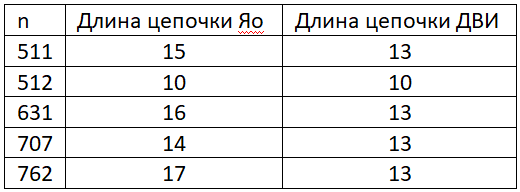

#### Вывод по алгоритму дробления вектора индексов.  

Алгоритм дробления индексов находит цепочки, меньшие по длине, чем алгоритм Яо. Однако вычисление данным методом цепочек для $n$>500 занимает большое количество времени(например, для 762 - 27 минут),поэтому данный алгоритм неудобен и обладает низкой эффективностью.

### Следствие 1 теоремы Брауэра.

Проверим следствие 1 теоремы Брауэра для n=1..200 путём построения функции l(n) и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов.  
Создадим массив с результатами значения для всех n 1..200 алгоритмом ДВИ.  
После вычислим для каждого значения ln(x) и yln(x).

In [94]:
import pylab as plt
n = 201
x = [i for i in range(1, n)]
results = [len(dvi(i)) for i in range(1, n)]
lnxi = [math.log(i, math.e) for i in range(1, n)]
lnxi_pow2 = [pow(math.log(i, math.e),2) for i in range(1, n)]
ylnxi = [results[i-1] * lnxi[i-1] for i in range(1, n)]

Результат отображения $y$ найдем по формуле $y=a+bln(x)$  
Формулы для а и b:
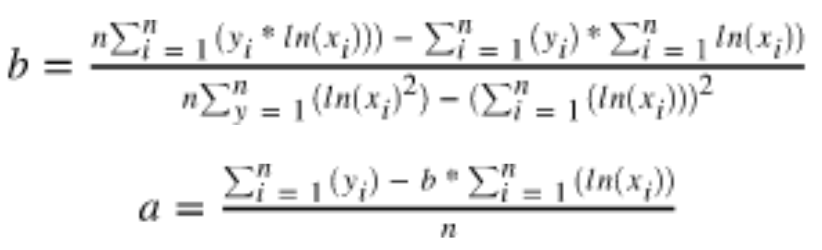

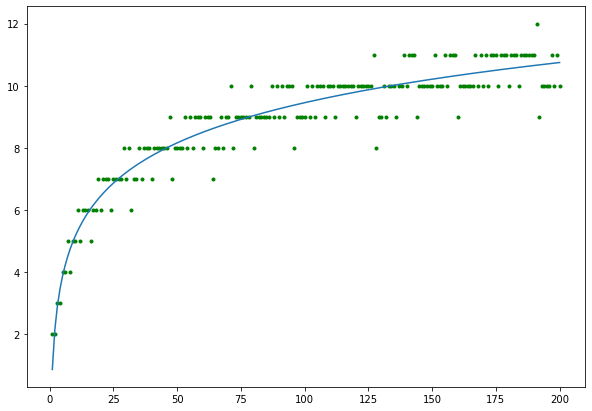

In [95]:
b = (n*sum(ylnxi) - sum(results)*sum(lnxi))/(n*sum(lnxi_pow2) - sum(lnxi)*sum(lnxi))
a = (sum(results) - b * sum(lnxi))/(n-1)

y = [a + b*lnxi[i-1] for i in range(1, n)]

plt.figure(figsize=(10, 7))
plt.scatter(x, results, color = 'green', marker = '.')
plt.plot(x, y)
plt.show()

#### Вывод по следствию 1 из теоремы Брауэра.  

По графику видно, что график логарифма аппроксимирует найденные минимальные длины цепочек(для 1 <= n <= 200).  
Первое следствие теоремы Брауэра справедливо: $\lim_{x \to \infty} l(n)/\lambda(n)=1$.

### Гипотеза Шольца-Брауэра.

Проверим неравенство $l*(2^n-1)<=l*(n)+n-1$ для 1<n<10 с помощью алгоритма ДВИ.

In [ ]:
import time
 
def inc_vector(vec, start_i=1):
    cur_max_i = start_i + len(vec) - 1
    for i in range(1, len(vec) + 1):
        vec[-i] += 1
        if vec[-i] > cur_max_i:
            if i == len(vec):
                vec.append(1)
                break
            vec[-i] = 1
            cur_max_i -= 1
        else:
            break
            
def get_chain(r, ro):
    q = len(r)
    add_chain = [1]
    for index in r:
        add_chain.append(add_chain[-1] + add_chain[index - 1])
    for index in ro:
        add_chain.append(add_chain[-1] + add_chain[index - 1])
    return add_chain
    
    
def dvi(n):
    m = int(log(n, 2))
    l_up = m + bin(n).count('1') - 1
    if m == log(n, 2):
        m -= 1
    while m <= l_up:
        q = int(m/2)
        if q == 0:
            q = 1
        r = [1 for i in range(q)]
        while len(r) == q:
            ro = [1 for i in range(m - q)]
            add_chain = get_chain(r, ro)
            if add_chain[-1] == n:
                return add_chain
            a_max = add_chain[q] * 2 ** (m - q)
            a_min = add_chain[q] + m - q
            if n < a_min or n > a_max:
                inc_vector(r)
                continue
            while len(ro) == m - q:
                add_chain = get_chain(r, ro)
                if add_chain[-1] == n:
                    return add_chain
                inc_vector(ro, q + 1)
            inc_vector(r)
        m += 1
    return add_chain

for n in range (2,11):
    left=dvi(pow(2,n)-1)
    right=dvi(n)
    if len(left)<=len(right)+n-1:
        print("Гипотеза подтвердилась, {}<={}+{}-1\n".format(len(left),len(right),n))
    else:
        print("Гипотеза не подтвердилась,{}>{}+{}-1\n".format(len(left),len(right),n))

Гипотеза подтвердилась, 3<=2+2-1

Гипотеза подтвердилась, 5<=3+3-1

Гипотеза подтвердилась, 6<=3+4-1

Гипотеза подтвердилась, 8<=4+5-1

Гипотеза подтвердилась, 9<=4+6-1

Гипотеза подтвердилась, 11<=5+7-1

Гипотеза подтвердилась, 11<=4+8-1

Гипотеза подтвердилась, 13<=5+9-1



Результат работы:  
Гипотеза подтвердилась, 3<=2+2-1

Гипотеза подтвердилась, 5<=3+3-1

Гипотеза подтвердилась, 6<=3+4-1

Гипотеза подтвердилась, 8<=4+5-1

Гипотеза подтвердилась, 9<=4+6-1

Гипотеза подтвердилась, 11<=5+7-1

Гипотеза подтвердилась, 11<=4+8-1  

Гипотеза подтвердилась, 13<=5+9-1 

Гипотеза подтвердилась, 14<=5+10-1

#### Вывод по гипотезе Шольца-Брауэра.  
Гипотеза подтвердилась для чисел $2<=n<=10$, значит для вычисления длины цепочки $l*(2^n-1)$ достаточно вычислить $l*(n)$+$n$-1.

### Вывод.  
В процессе выполнения практической работы были изучены аддитивные цепочки . Также были реализованы алгоритмы для работы с ними, такие как  алгоритм для нахождения минимальных и приблизительных аддитивных цепочек. Была изучена зависимость минимальных длин звездных цепочек от числа. 
Также был получен навык работы в системе компьютерной алгебры SageMath.
Реализованные алгоритмы:
1. Бинарный метод
2. Метод множителей 
3. Алгоритм Яо
4. Алгоритм дробления вектора индекса

Также были проверены:
1. Первое следствие теоремы Брауэра 
2. Гипотеза Шольца-Брауэра для n=1..10